In [1]:
import numpy as np
from matplotlib import pyplot as plt
from otimo import SecaoAurea, gradiente

# Métodos Quasi-Newton

## Definição da função-objetivo

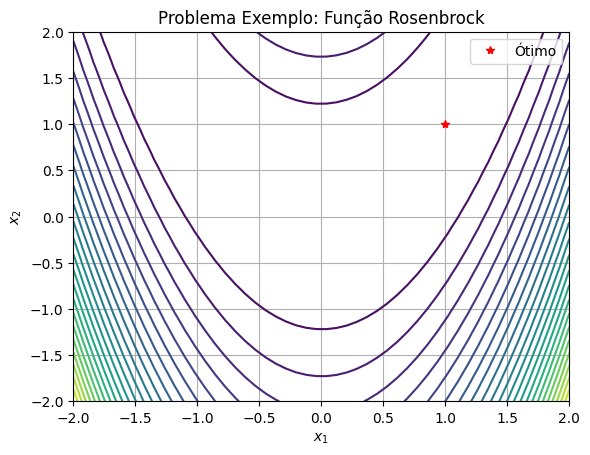

In [2]:
x0 = np.zeros((2, 1))
x0[0] = -.5
x0[1] = .5

# Definição da função objetivo
def fx(x):
    x1, x2 = x[0], x[1]
    return 100*(x2-x1**2)**2 + (1-x1)**2

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Avalia função para plotar contorno
f = 100*(x2-x1**2)**2 + (1-x1)**2

# Plota contorno
plt.contour(x1, x2, f, levels=30)
plt.plot([1.], [1.], '*r', label='Ótimo')
plt.legend()
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo: Função Rosenbrock')
plt.grid()
plt.show()

## Correção do posto 1

Correção de H
Correção de H
Correção de H
Correção de H


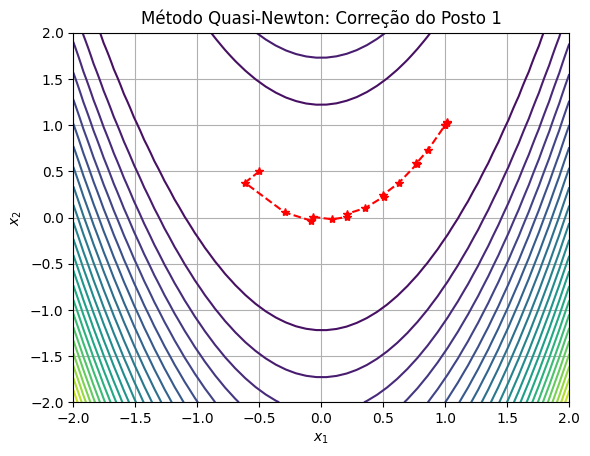

Número de avaliações: 462


In [3]:
x = x0.copy()
feval = fx(x)
xlist = [x0.copy()]
navaliacoes = 1

# Aproximação inicial da inversa da matriz hessiana
Hh = np.eye(x.size)

# Primeira estimativa do gradiente
g, nava = gradiente(x, fx, feval)
navaliacoes += nava

for it in range(18):
    
    # Determina a direção de busca
    d = - Hh @ g
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Grava informações antes do passo
    xanterior = x.copy()
    ganterior = g.copy()
    
    # Dá o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    navaliacoes += 1
    
    # Estima novo gradiente
    g, nava = gradiente(x, fx, feval)
    navaliacoes += nava
    
    xlist.append(x.copy())

    # Atualiza vetores v e r
    v = xanterior-x
    r = ganterior-g
    
    # Coloca na forma vetor-coluna
    v = v.reshape((-1, 1))
    r = r.reshape((-1, 1))

    # Atualização de Hh
    Hh = Hh + 1/(r.T@v - r.T@Hh@r)*(v-Hh@r)@(v-Hh@r).T
    
    # Verifica autovalores
    autovalores, _ = np.linalg.eig(Hh)
    if np.any(autovalores < 0.):
        print('Correção de H')
        Hh = np.eye(x.size)

# Plota trajetória
xlist = np.array(xlist)
plt.contour(x1, x2, f, levels=30)
plt.plot(xlist[:, 0], xlist[:, 1], '--*r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Método Quasi-Newton: Correção do Posto 1')
plt.grid()
plt.show()
print('Número de avaliações: %d' % navaliacoes)

## Método DFP

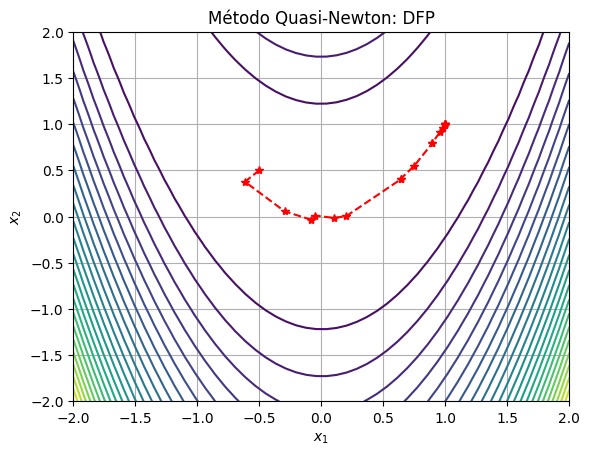

Número de avaliações: 584


In [4]:
x = x0.copy()
feval = fx(x)
xlist = [x0.copy()]
navaliacoes = 1

# Aproximação inicial da inversa da matriz hessiana
Hh = np.eye(x.size)

# Primeira estimativa do gradiente
g, nava = gradiente(x, fx, feval)
navaliacoes += nava

for it in range(18):
    
    # Determina a direção de busca
    d = - Hh @ g
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Grava informações antes do passo
    xanterior = x.copy()
    ganterior = g.copy()
    
    # Dá o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    navaliacoes += 1
    
    # Estima novo gradiente
    g, nava = gradiente(x, fx, feval) 
    navaliacoes += nava
    
    xlist.append(x.copy())

    # Atualiza vetores v e r
    v = xanterior-x
    r = ganterior-g
    
    # Coloca na forma vetor-coluna
    v = v.reshape((-1, 1))
    r = r.reshape((-1, 1))

    # Atualização de Hh
    Hh = Hh + v@v.T/(v.T@r) - Hh@r@r.T@Hh/(r.T@Hh@r)
    
    # Verifica autovalores
    autovalores, _ = np.linalg.eig(Hh)
    if np.any(autovalores < 0.):
        print('Correção de H')
        Hh = np.eye(x.size)

# Plota trajetória
xlist = np.array(xlist)
plt.contour(x1, x2, f, levels=30)
plt.plot(xlist[:, 0], xlist[:, 1], '--*r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Método Quasi-Newton: DFP')
plt.grid()
plt.show()
print('Número de avaliações: %d' % navaliacoes)

## Método BFGS

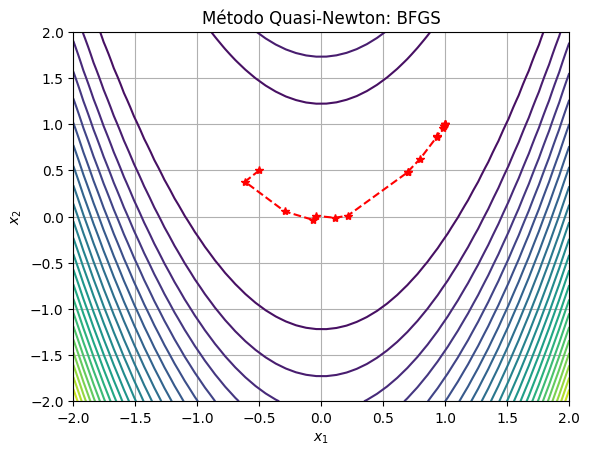

Número de avaliações: 479


In [5]:
x = x0.copy()
feval = fx(x)
xlist = [x0.copy()]
navaliacoes = 1

# Aproximação inicial da inversa da matriz hessiana
Hh = np.eye(x.size)

# Primeira estimativa do gradiente
g, nava = gradiente(x, fx, feval)
navaliacoes += nava

for it in range(16):
    
    # Determina a direção de busca
    d = - Hh @ g
    
    # Função de otimização unidimensional
    def theta(a):
        return fx(x + a*d)

    # Determina o passo ótimo    
    alpha, nava = SecaoAurea(precisao=1e-3, passo=1e-2).resolva(theta)
    navaliacoes += nava

    # Grava informações antes do passo
    xanterior = x.copy()
    ganterior = g.copy()
    
    # Dá o passo
    x = x + alpha * d
    feval = fx(x) # Avalia a função no novo ponto
    navaliacoes += 1
    
    # Estima novo gradiente
    g, nava = gradiente(x, fx, feval) 
    navaliacoes += nava
    
    xlist.append(x.copy())

    # Atualiza vetores v e r
    v = xanterior-x
    r = ganterior-g
    
    # Coloca na forma vetor-coluna
    v = v.reshape((-1, 1))
    r = r.reshape((-1, 1))

    # Atualização de Hh
    Hh = Hh + (1 + r.T@Hh@r/(r.T@v))*v@v.T/(v.T@r)  - (v@r.T@Hh + Hh@r@v.T)/(r.T@v)
    
    # Verifica autovalores
    autovalores, _ = np.linalg.eig(Hh)
    if np.any(autovalores < 0.):
        print('Correção de H')
        Hh = np.eye(x.size)

# Plota trajetória
xlist = np.array(xlist)
plt.contour(x1, x2, f, levels=30)
plt.plot(xlist[:, 0], xlist[:, 1], '--*r')
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Método Quasi-Newton: BFGS')
plt.grid()
plt.show()
print('Número de avaliações: %d' % navaliacoes)